## Vector data - regridding

This section introduces **regridding** vector data onto your plot’s coordinate reference system (CRS). Regridding ensures that vector data is uniformly distributed across the map projection, preventing overcrowding and providing a consistent density of arrows or flags.

### Example: Wind from Storm Ophelia (October 2017)

In this example, we will use sample wind data from Storm Ophelia, which impacted the UK in October 2017.

In [1]:
import earthkit as ek

data = ek.data.from_source("sample", "storm_ophelia_wind_850.grib")
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,u,isobaricInhPa,850,20171016,0,0,an,0,regular_ll
1,ecmf,v,isobaricInhPa,850,20171016,0,0,an,0,regular_ll


### Regridding with `Regrid`

To regrid our vector points, we can use the `Regrid` class from `earthkit.plots.resample`.

You can specify the desired number of points in x and y. The points are evenly distributed over the plot, on your plot's coordinate reference system. If we also plot the original grid cells, you can see that the new points are regridded onto our map's coordinate system.

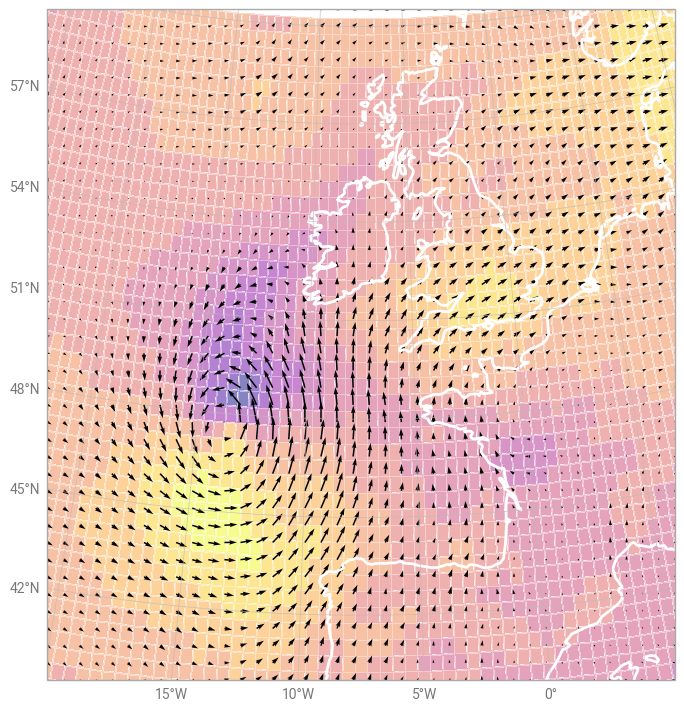

In [2]:
from earthkit.plots.resample import Regrid

# Create a map of the region around the UK
chart = ek.plots.Map(domain=[-20, 5, 40, 60])

# Plot the original grid cells of the wind U component
chart.grid_cells(data.sel(short_name="u"), edgecolors="white", linewidths=0.5, alpha=0.5)

# Plot wind arrows with 40 points in x and y
chart.quiver(data, resample=Regrid(40))

# Add map features
chart.coastlines(color="white", linewidth=2)
chart.gridlines()

# Show the plot
chart.show()

#### Different densities in x and y

You can also specify different densities for x and y with the `nx` and `ny` arguments. Let's do that now with 50 x points and 20 y points.

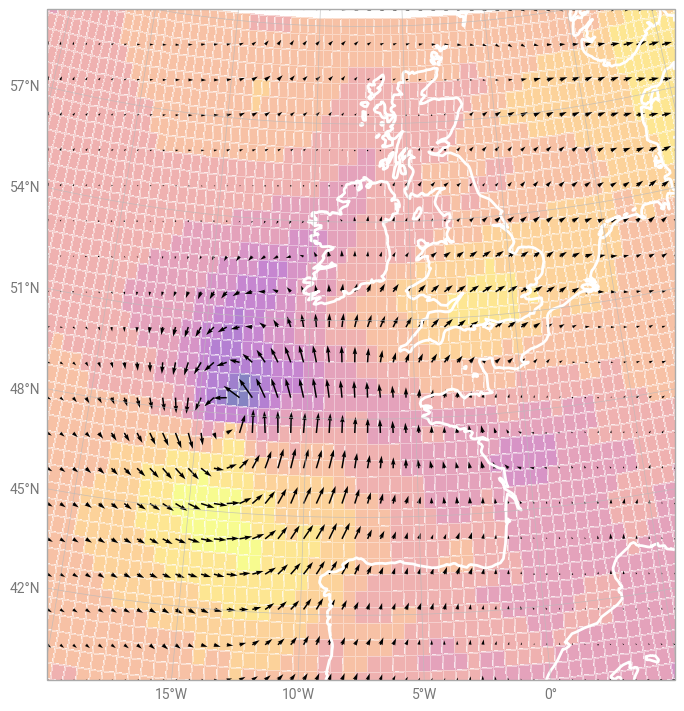

In [3]:
# Create a map of the region around the UK
chart = ek.plots.Map(domain=[-20, 5, 40, 60])

# Plot the original grid cells of the wind U component
chart.grid_cells(data.sel(short_name="u"), edgecolors="white", linewidths=0.5, alpha=0.5)

# Plot wind arrows at every third x point and every second y point
chart.quiver(data, resample=Regrid(nx=50, ny=20))

# Add map features
chart.coastlines(color="white", linewidth=2)
chart.gridlines()

# Show the plot
chart.show()

<div class="alert alert-block alert-info">
<strong>NOTE:</strong> Unlike <code>Subsample</code>, with <code>Regrid</code> you always get the number of points requested. You can also ask for a higher density than your source data.
</div>

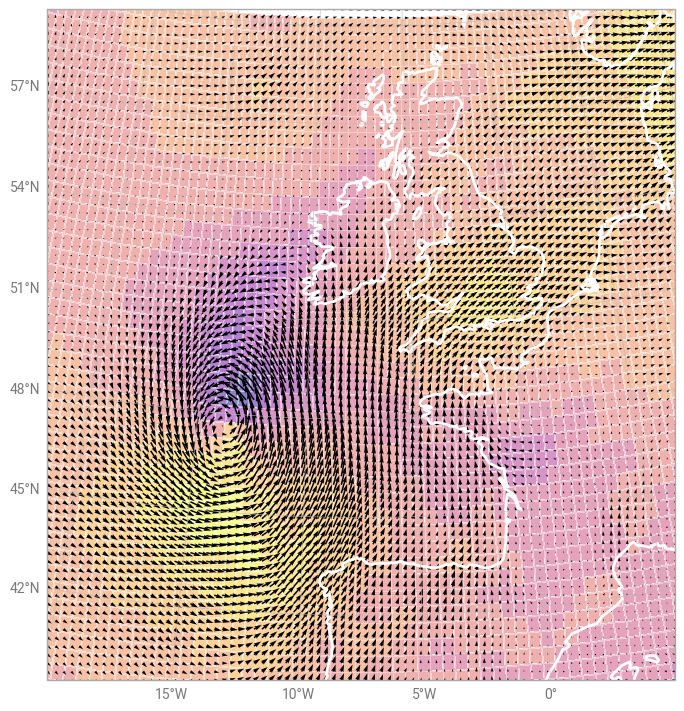

In [4]:
# Create a map of the region around the UK
chart = ek.plots.Map(domain=[-20, 5, 40, 60])

# Plot the original grid cells of the wind U component
chart.grid_cells(data.sel(short_name="u"), edgecolors="white", linewidths=0.5, alpha=0.5)

# Plot wind arrows with 80 points in x and y
chart.quiver(data, resample=Regrid(80))

# Add map features
chart.coastlines(color="white", linewidth=2)
chart.gridlines()

# Show the plot
chart.show()